# Wine Quality Testing - Red Wine

## Introduction

#### Conducting data analysis and hypothesis testing for the quality of red wine based on alcohol content

## Data Exploration

In [84]:
# Importing libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats
import seaborn as sns
%matplotlib inline


In [110]:
red_wine = pd.read_csv("winequality-red.csv", delimiter=';', header = 0)
red_wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


From the data, we only need two columns out of the 12, in order to conduct our analysis. 

Therefore, a new dataframe named "alcohol_quality" was created:

In [111]:
#Creating a new dataframe with the alcohol and quality columns only
alcohol_quality = red_wine[["alcohol", "quality"]].copy()
alcohol_quality.head()

,alcohol,quality
0,9.4,5
1,9.8,5
2,9.8,5
3,9.8,6
4,9.4,5


## Defining Null and Alternative Hypothesis

Null_Hypothesis: Wines with a higher quality rating do not have a higher median alcohol content than wines with a lower quality rating.

Alternative_Hypothesis: Wines with a higher quality rating have a higher median alcohol content than wines with a lower quality rating.

### Grouping the wines into "low quality" and "High quality wines"

 "Low quality" wines are those with a quality rating of 5 or below and high quality wines are those with a rating of between 6 and 10

Two dataframes were created to store this data

In [89]:
# Creating two dataframes 
low_quality = alcohol_quality[alcohol_quality['quality'] <= 5]
high_quality = alcohol_quality[alcohol_quality['quality'] > 5]



In [90]:
low_quality.head()

,alcohol,quality
0,9.4,5
1,9.8,5
2,9.8,5
4,9.4,5
5,9.4,5


In [91]:
low_quality.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 744 entries, 0 to 1597
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   alcohol  744 non-null    float64
 1   quality  744 non-null    int64  
dtypes: float64(1), int64(1)
memory usage: 17.4 KB


Drawing a sample of 500 items from the dataset

In [112]:
sample_low = low_quality.sample(n=500, random_state=42)
sample_high = high_quality.sample(n=500, random_state=42)

In [124]:
# Finding the median for the two sample groups
low_quality_median = sample_low["alcohol"].median()
high_quality_median = sample_high["alcohol"].median()

print("The median for the low quality wine is: ", low_quality_median)
print("The median for the high quality wine is: ", high_quality_median)

The median for the low quality wine is:  9.7
The median for the high quality wine is:  10.75


Checking if dataset is normally distributed:

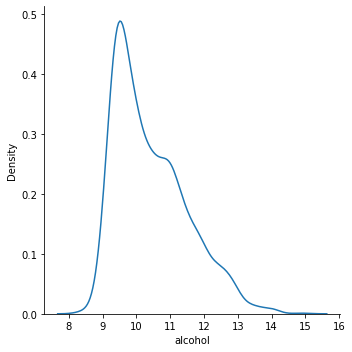

In [127]:
# Plotting a density curve
sns.displot(alcohol_quality["alcohol"], kind="kde")

In [128]:
from scipy.stats import normaltest


# performing the normality test
stat, p = normaltest(alcohol_quality["alcohol"])

# interpret the test results
alpha = 0.05
if p < alpha:  # null hypothesis rejected
    print("Data is not normally distributed")
else:  # null hypothesis not rejected
    print("Data is normally distributed")


Data is not normally distributed


# Result

In [142]:
#Calculating the difference between the two medians:
diff = high_quality_median - low_quality_median
diff

1.0500000000000007

This shows that there is a difference between the medians of the high quality red wines and the low quality red wines.
It shows that the the higher quality red wines have a higher median compared to the lower quality red wines

# Verifying the results

Since the data is not normally distributed, we perform a non parametric test.

As we are comparing the difference in median between two samples, the **Wilcoxon signed test** is used.

The **Wilcoxon signed test**  is a non-parametric test that is used to compare two samples by testing whether the median difference between the two samples is zero or not

In [145]:
from scipy.stats import wilcoxon

# Calculate the differences between the groups
diff = high_quality_median - low_quality_median

# Perform the Wilcoxon signed-rank test
stat, p = wilcoxon(sample_high["alcohol"], sample_low["alcohol"])

# Print the results
print("Test statistic: ", stat)
print(f"P-value: ", p)
if p < 0.05:
    print("Reject the null hypothesis.")
else:
    print("Fail to reject the null hypothesis.")

Test statistic:  21703.0
P-value:  1.3533977754937564e-32
Reject the null hypothesis.


Therefore, The null statistic is rejected and this confirms that **Wines with a higher quality rating have a higher median alcohol content than wines with a lower quality rating**